In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

import pandas as pd

In [11]:
from minisom import MiniSom

In [12]:
from math import sqrt

In [13]:
data1 = np.load('/home/iotadmin/notebooks/array/FLFZ_window.npy')[:222027]

FileNotFoundError: [Errno 2] No such file or directory: 'D:/현대차 데이터/clustering/두번째 vm/sangeon/array/FLFZ_window.npy'

In [ ]:
data = np.load('/home/iotadmin/notebooks/array/FLFZ_window.npy')[:222027] # 클러스터링 할 윈도우

In [14]:
som = MiniSom(a, a, data.shape[1], sigma=2., learning_rate=0.5, 
              neighborhood_function='gaussian',activation_distance='cosine', random_seed=10) #클러스터링
som.pca_weights_init(data)
print("Training...")
som.train_batch(data, 50000, verbose=True)  # random training
print("\n...ready!")
win_map = som.win_map(data)

Training...
 [ 50000 / 50000 ] 100% - 0:00:00 left 
 quantization error: 3657.7374600035023

...ready!


In [ ]:
data = pd.read_csv('/home/iotadmin/notebooks/두번째 vm/csv/all_multitask.csv').iloc[:222027]

In [17]:
index2 = []
x = data['FLFZ']
y = data['FLFZ_pred']

for i in range(len(x)):
    if abs(x[i] - y[i]) < 200: #오차 200미만은 잘 맞춘 배열에 저장
        index2.append(i)

In [18]:
index = []
x = data['FLFZ']
y = data['FLFZ_pred']

for i in range(len(x)):
    if abs(x[i] - y[i]) > 2000: #오차 2000초과는 잘 못 맞춘 배열에 저장
        index.append(i)

In [20]:
precise = []
for i in range(len(index2)):
    precise.append(data1[index2[i]])

In [21]:
not_precise = []
for i in range(len(index)):
    not_precise.append(data1[index[i]])

In [22]:
precise_map = som.win_map(precise)

In [23]:
not_precise_map = som.win_map(not_precise)

In [24]:
precise_cluster = precise_map.keys()

In [25]:
not_precise_cluster = not_precise_map.keys()

In [26]:
precise_cluster = list(precise_cluster)

In [27]:
not_precise_cluster = list(not_precise_cluster)

In [30]:
precise = np.array(precise)

In [31]:
not_precise = np.array(not_precise)

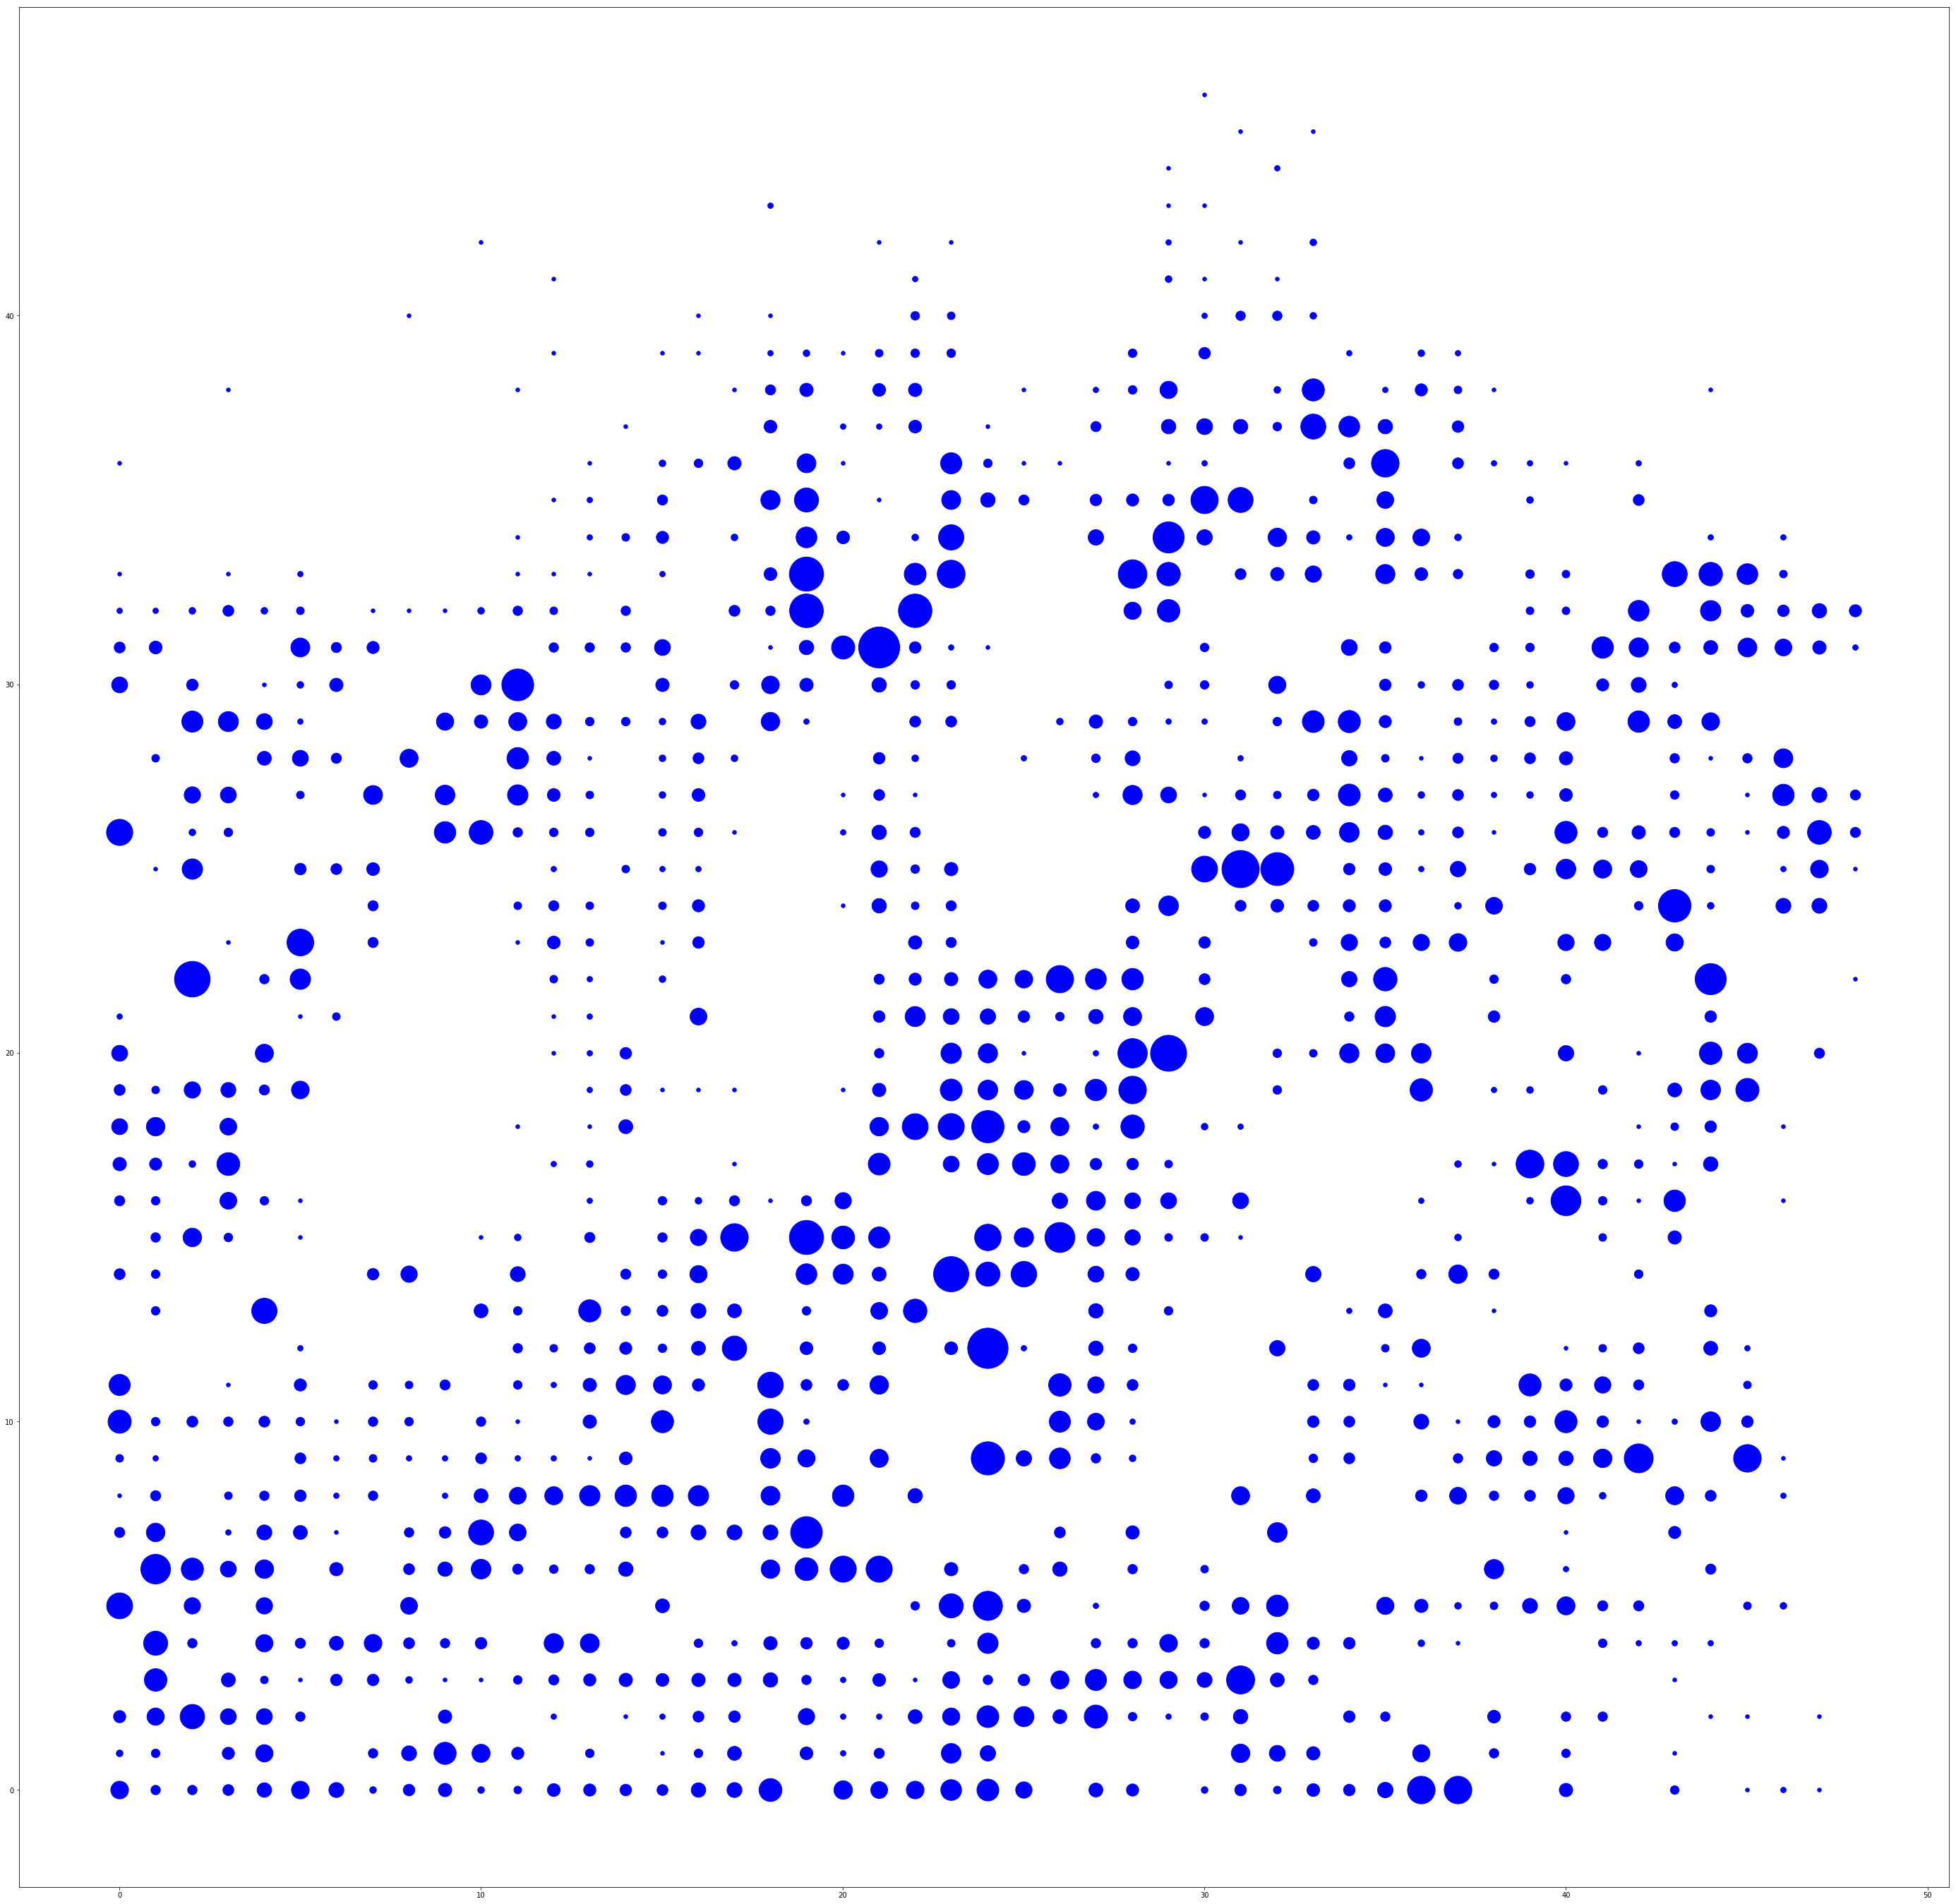

In [94]:
plt.figure(figsize=(49, 49)) #잘맞춘 클러스터 시각화
the_grid = GridSpec(49, 49)
size = 0
coor = (0,0)
for i in precise_cluster:
    if(i not in not_precise_cluster):
        if(len(precise_map[i]) > size):
            size = len(precise_map[i])
            coor = i
        plt.scatter(i[0], i[1], c='b' , s=len(precise_map[i])*30)
    '''plt.subplot(i[0], i[1])
    plt.plot(np.min(win_map[position], axis=0), color='gray', alpha=.5)
    plt.plot(np.mean(win_map[position], axis=0))
    plt.plot(np.max(win_map[position], axis=0), color='gray', alpha=.5)'''
plt.savefig('precise1.png')

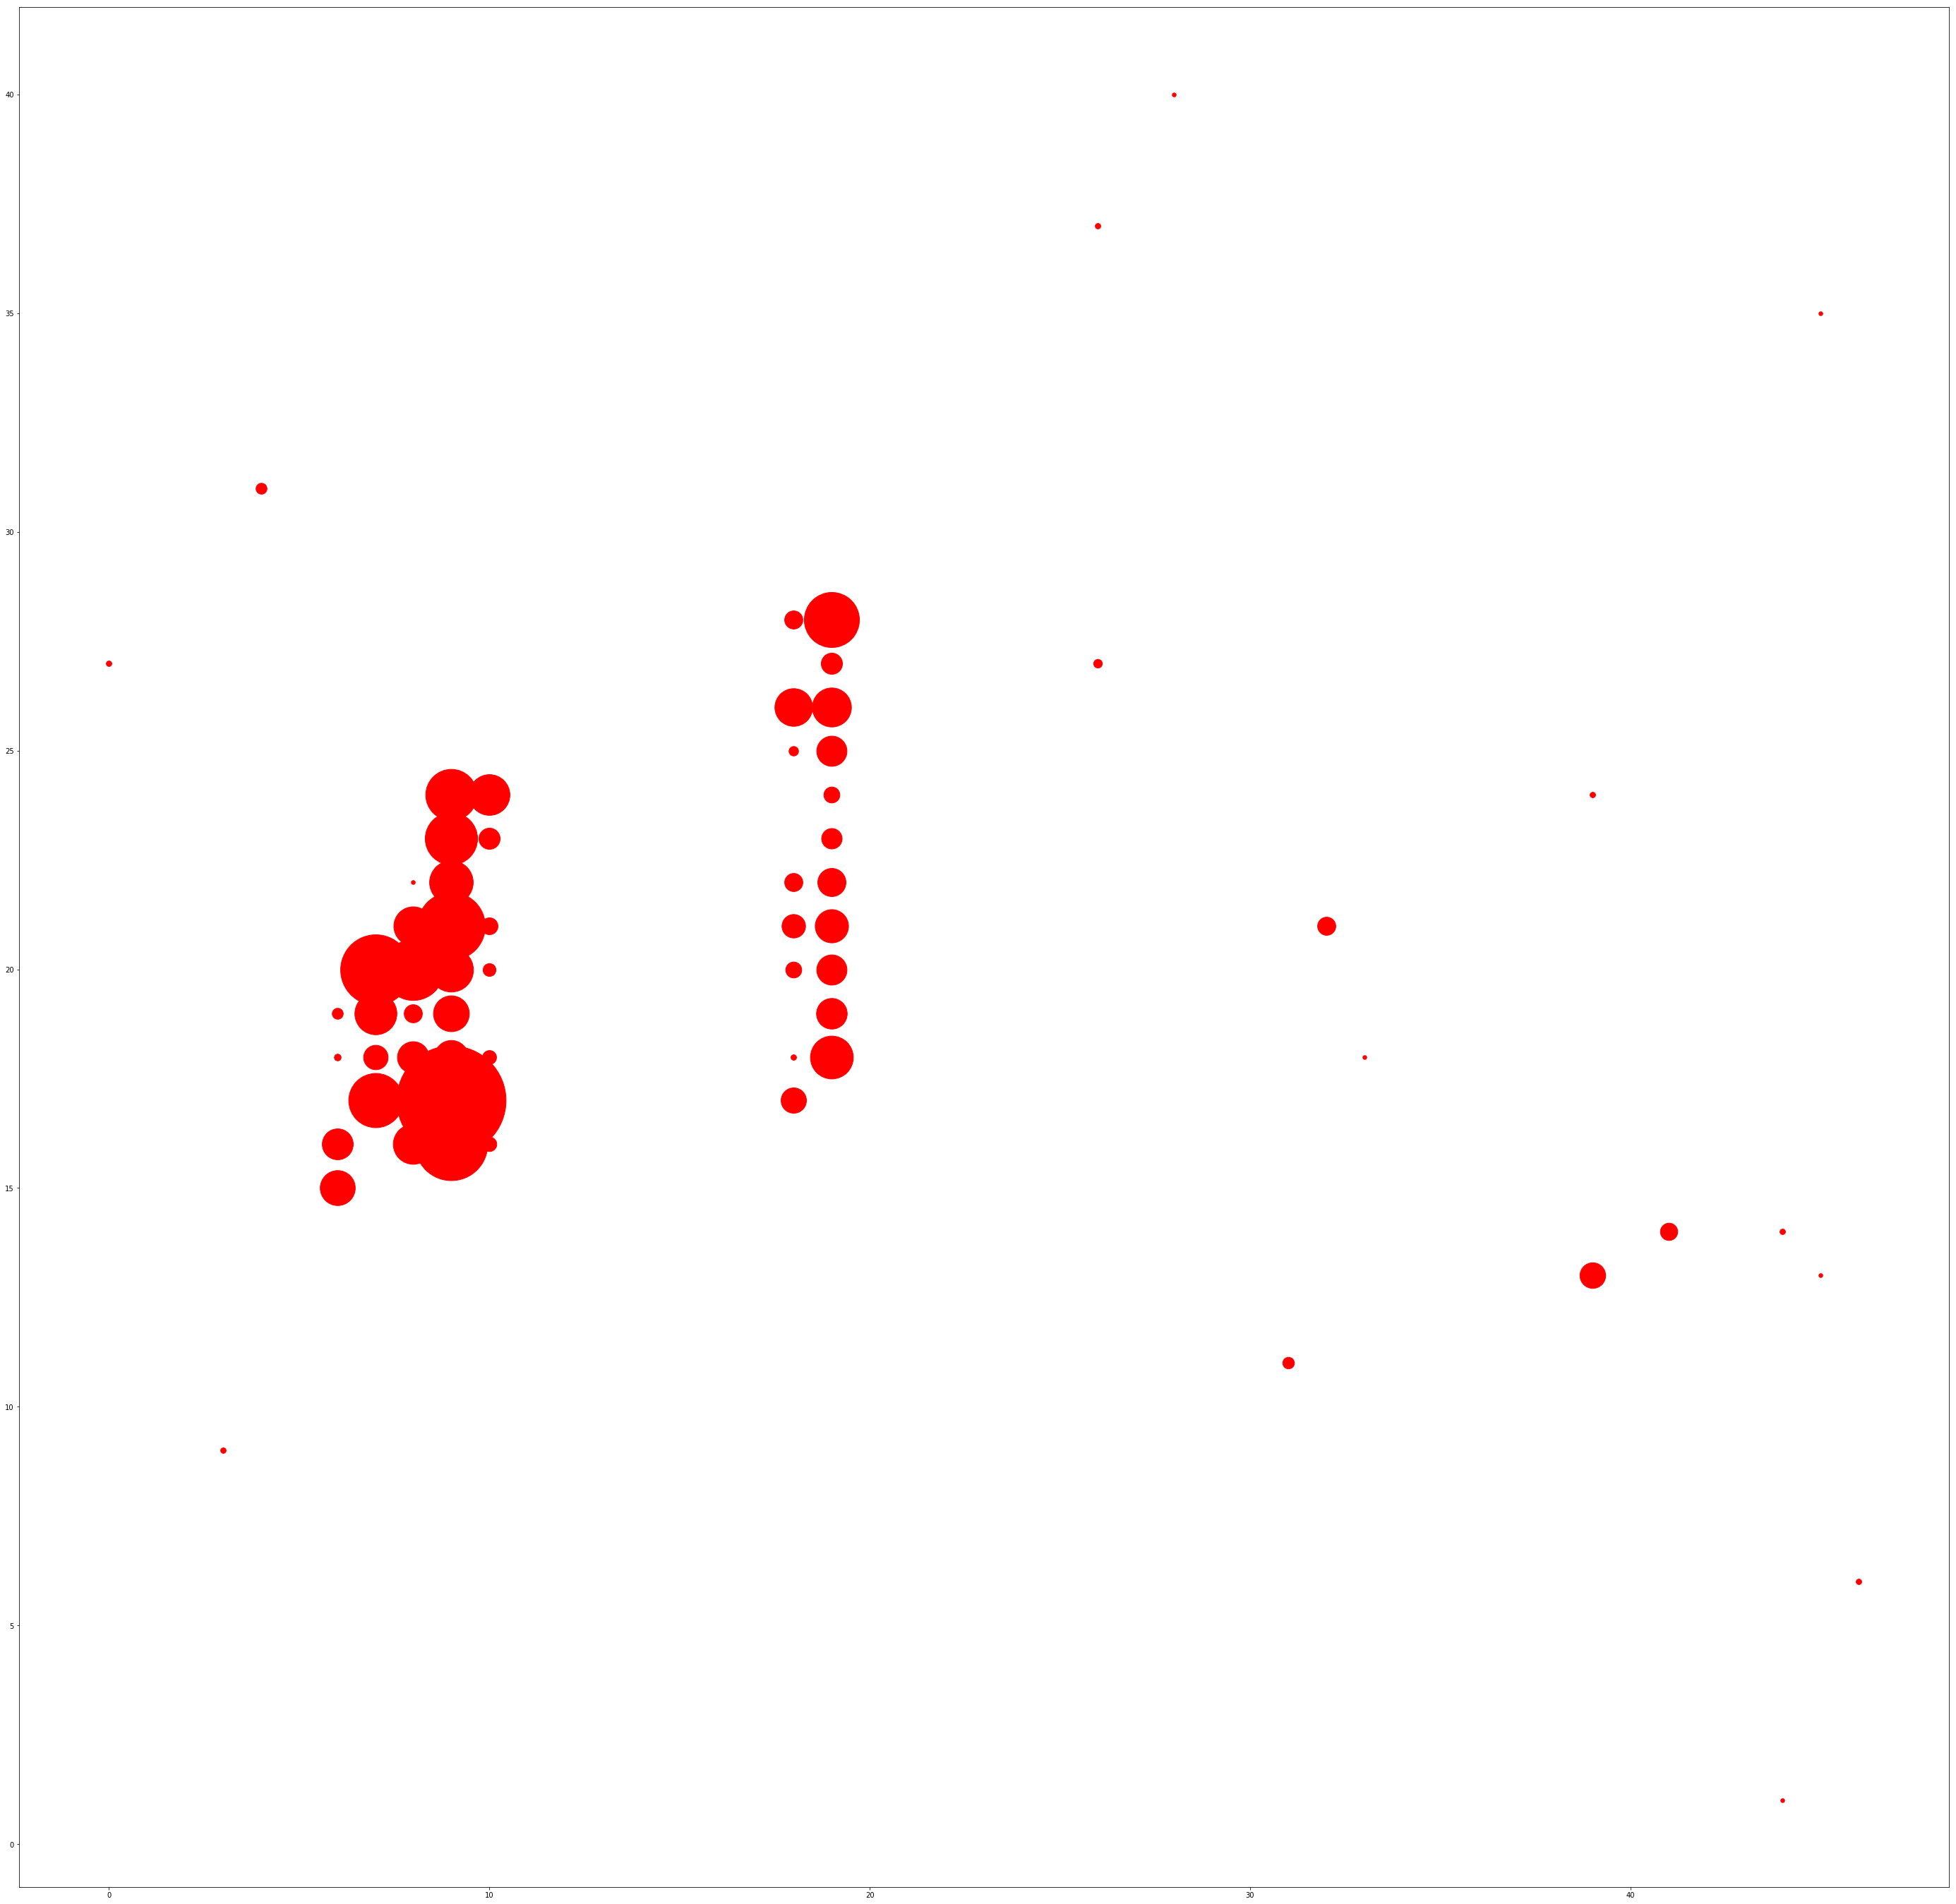

In [68]:
plt.figure(figsize=(49, 49)) #잘 못맞춘 클러스터 시각화
the_grid = GridSpec(49, 49)
size = 0
coor = (0,0)
for i in not_precise_cluster:
    if(i not in precise_cluster):
        if(len(not_precise_map[i]) > size):
            size = len(not_precise_map[i])
            coor = i
        plt.scatter(i[0], i[1], c='r' , s=len(not_precise_map[i])*30)
plt.savefig('not_precise1.png')

In [ ]:
a = []
for i in range(len(index)):
    a.append(data1[i])
c = list(win_map.keys())

d = [] # 못맞춘 클러스터를 d 배열에 넣어 확인
for i in tqdm(range(len(a))):
    for j in (range(len(c))):
        for k in (range (len(win_map[c[j]]))):
            if np.array_equal(a[i],win_map[c[j]][k]):
                d.append(j)
                print(j)
                break